## Neural Network

- $\text{by Michael Nielsen}$





In [273]:
import numpy as np
import random

In [274]:
class Network(object):
    
    def __init__(self, sizes) -> None:
        """The list ``sizes`` contains the number of neurons in the
        respective layers of the network. For example; If the list
        was [2, 3, 1] then it would be a three-layer network, with the
        first layer containing 2 neuron, the second layer 3 neuron,
        and the third layer 1 neuron, the biases and the weights for 
        the network are initialized randomly, using a Gaussian 
        distribution with the mean 0, variance 1. Note that the first 
        layer is assume to be input layer, and by convention we won't
        set any biases for those neurons, since biases are only ever
        used in computing the outputs form later layer (hidden layer)"""
        
        self.num_layer  = len(sizes)
        self.sizes = sizes
        self.biases = [np.random.randn(y, 1) for y in sizes[1:]]
        self.weights = [np.random.randn(y, x) for x,y in zip(sizes[:-1], sizes[1:])]


    def sigmoid(self, z) -> np.float32:
        """Sigmoid function"""
        return 1.0 / (1.0 + np.exp(-z))
    

    def derivative_sigmoid(self, z) -> np.float32:
        """Derivative sigmoid function"""
        return self.sigmoid(z) * (1 - self.sigmoid(z))
    

    def feedforward(self, a):
        """Return the output of the network if ``a`` is input"""
        for b, w in zip(self.biases, self.weights):
            a = self.sigmoid(np.dot(w,a) + b)

        return a
    

    def loss(self, output_activation, y):
        """Return the vector of loss between output and y"""
        return (output_activation - y)
    

    def evaluate(self, test_data):
        """Return the number of test inputs for which the neural
        network outputs the correct result. Note that the neural
        network's output is assumed to be the index of whichever
        neuron in the final layer has the highest activation."""
        test_results = [(np.argmax(self.feedforward(x)), y) for x,y in test_data]

        return sum(int(x == y) for (x,y) in test_results)

    

    def stochastic_gradient_descent(self, training_data, epochs, mini_batch_size, eta, test_data=None):
        """Train the neural net using mini_batch stochastic
        gradient descent, The ``training_data`` is a list of 
        tuples ``(x, y)`` representing the training input and
        the desired outputs, The other non-optional parameters
        are self-explanatory. If ``test_data`` is provided then
        # if type(value) is list:
            # for val in value:
                # print(val, '\n')       the network will be evaluated against the test data after
        each epoch, and partial progress printed out. This is 
        useful for tracking progress, but slows things down 
        substantially"""
        if test_data:
            n_test = len(test_data)

        n = len(training_data)
        for i in range(epochs):

            random.shuffle(training_data)
            mini_batches = [
                training_data[k: k + mini_batch_size] for k in range(0, n, mini_batch_size)
            ]

            for mini_batch in mini_batches:
                self.update_mini_batch(mini_batch, eta)

            if test_data:
                print(f"Epoch {i}: {self.evaluate(test_data)} / {n_test} ")
            else:
                print(f"Epoch {i} completed")

    
    def update_mini_batch(self, mini_batch, eta):
        """Update the network's weights and biases by applying
        gradient descent using back-propagation to a single 
        mini-batch. The ``mini_batch`` is a list of tuple ``(X, y)``
        and eta is the learning rate or might refer to alpha"""

        nabla_b = [np.zeros(b.shape) for b in self.biases]
        nabla_w = [np.zeros(w.shape) for w in self.weights]

        for x, y in mini_batch:

            delta_nabla_b, delta_nabla_w = self.backprop(x, y)
            nabla_b = [nb + dnb for nb, dnb in zip(nabla_b, delta_nabla_b)]
            nabla_w = [nw + dnw for nw, dnw in zip(nabla_w, delta_nabla_w)]

            self.weights = [w - (eta/len(mini_batch)) * nw for w, nw in zip(self.weights, nabla_w)]
            self.biases  = [b - (eta/len(mini_batch)) + nb for b, nb in zip(self.biases,  nabla_b)]

        
    def backprop(self, x, y):
        """Return a tuple ``(nabla_b, nabla_w)`` representing the 
        gradient for the cost function C_x, ``nabla_b`` and ``nabla_w``
        are layer-by-layer lists of numpy array, similar to
        ``self.biases`` and ``self.weights``."""

        nabla_b = [np.zeros(b.shape) for b in self.biases]
        nabla_w = [np.zeros(w.shape) for w in self.weights]

        # feedforward
        activation = x
        activations = [x]
        zs = []

        for b, w in zip(self.biases, self.weights):

            z = np.dot(w, activation) + b
            zs.append(z)
            activation = self.sigmoid(z)
            activations.append(activation)

        # backward pass
        delta = self.loss(activations[-1], y) * self.derivative_sigmoid(zs[-1])

        nabla_b[-1] = delta
        nabla_w[-1] = np.dot(delta, activations[-2].transpose())
                             
        for l in range(2, self.num_layer):

            z = zs[-l]
            sp = self.derivative_sigmoid(z)
            delta = np.dot(self.weights[-l + 1].transpose(), delta) * sp
            nabla_b[-l] = delta
            nabla_w[-l] = np.dot(delta, activations[-l - 1].transpose())

        return (nabla_b, nabla_w)




### *Testing*

---

## Neural Net Analysis

- *Neural nets are now under my control*

### *Network*

In [275]:
sizes = [2,3,4,1]

network = {'sizes':None, 
           'n_layers':None, 
           'biases' :None, 
           'weights':None,
           'biases_shape' : None,
           'weights_shape': None }

def initialize_network(network_size):
    
    network['sizes'] = network_size
    network['n_layers'] = len(network_size)
    network['biases'] = [np.random.randn(n_neurons, 1) for n_neurons in sizes[1:]]
    network['weights']  = [np.random.randn(input_size, n_neurons) for input_size, n_neurons  in zip(sizes[1:], sizes[:-1])]
    network['biases_shape'] =  [bias.shape for bias in network['biases']]
    network['weights_shape'] = [weight.shape for weight in network["weights"]]


def network_params():

    print("Neural net params:")
    print("~" * 60, '\n')

    for key, value in network.items():
        print(f"{key} : {value}\n")

    print("\n", "~" * 60, '\n')

initialize_network(network_size=sizes)
network_params()



Neural net params:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ 

sizes : [2, 3, 4, 1]

n_layers : 4

biases : [array([[-1.32765863],
       [-0.93819124],
       [-0.83962722]]), array([[-0.35147417],
       [-0.37127407],
       [ 0.21860779],
       [ 0.57585532]]), array([[-1.39756237]])]

weights : [array([[-0.93730449,  0.99891713],
       [ 1.04260173, -0.59196504],
       [-0.38881551, -1.21290153]]), array([[ 0.17229952,  0.28093324,  0.68613271],
       [ 0.45046864, -0.03548488,  0.91363497],
       [-0.32017231, -0.40024135,  2.53995249],
       [-0.77135256,  1.24731747, -1.11937558]]), array([[-0.13590568,  0.78861676, -1.14907576,  0.85617697]])]

biases_shape : [(3, 1), (4, 1), (1, 1)]

weights_shape : [(3, 2), (4, 3), (1, 4)]


 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ 



### *Testing*

In [276]:
gradient_biases  = [np.zeros(b.shape) for b in network['biases']]                      
gradient_weights = [np.zeros(w.shape) for w in network['weights']] 

gradient_biases,"^" ,gradient_weights

([array([[0.],
         [0.],
         [0.]]),
  array([[0.],
         [0.],
         [0.],
         [0.]]),
  array([[0.]])],
 '^',
 [array([[0., 0.],
         [0., 0.],
         [0., 0.]]),
  array([[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]),
  array([[0., 0., 0., 0.]])])

### *ReLU function*

$\text{Rectified Linear Unit}$

- $\large ReLU(x) = max(0, x)$

In [277]:
def ReLU(x) -> np.float32:
    """Rectified Linear Unit function"""
    return np.max(0, x)

### *Sigmoid function*

- $\Large \sigma(x) = \frac{1}{1 + e^{-x}}$


In [278]:
def sigmoid(x) -> np.float32:
    """Sigmoid function"""
    return 1.0 / (1.0 + np.exp(-x))


### *Derivative sigmoid function*

$\Large \sigma^\prime(x)  = \frac{1}{1 + e^{-x}} \frac{d\sigma}{dx} = \sigma(x)(1 - \sigma(x))$

$\!$

<details>
    <summary><i>Derive sigmoid function</i></summary>
    
$\textsf{Let’s derive this derivative of sigmoid function as follows:}$

1. $\textsf{Let} \; \large y = \sigma(x) = \large \frac{1}{1 + e^{-x}}$

2. $\textsf{Let u = } \; \large{1 + e^{-x}.} \;\small \textsf{Thus}, \;\large y = \frac{1}{u}$ 

3. $\textsf{First, find the derivative of u with respect to} \; \large x: \frac{du}{dx} = -e^{-x}$

4. $\textsf{Then, find the derivative of y with respect to} \; \large u: \frac{dy}{du} = -\frac{1}{u^2}$

5. $\textsf{Apply the chain rule} \; \large : \\ \quad \Rightarrow \frac{dy}{dx} =  \frac{dy}{du} . \frac{du}{dx} = -\frac{1}{u^2} . (-e^{-x}) = \frac{e^{-x}}{({1 + e^{-x}})^2}  $

$\large \qquad \; \; \Rightarrow \sigma(x) = \frac{1}{1 + e^{-x}} ,\; 1 - \sigma(x) = \frac{e^{-x}}{1 + e^{-x}}$

6. $\textsf{Thus} ,\; \large \sigma^\prime(x) = \frac{e^{-x}}{({1 + e^{-x}})^2} = (\frac{1}{1 + e^{-x}})(\frac{e^{-x}}{1 + e^{-x}}) = \Large \sigma(x)(1 - \sigma(x))$

*[Derivative Sigmoid function](https://www.geeksforgeeks.org/derivative-of-the-sigmoid-function/)*

</details>

In [279]:
def derivative_sigmoid(z) -> np.float32:
    """Derivative sigmoid function"""
    return sigmoid(z) * (1 - sigmoid(z))


### *Feed_forward*

- $\large z = w . a + b$

- $\large a = \sigma(z)$

In [280]:
def feed_forward(a):                                               # -> a: as a input of the network
    """Return the output of the network by feed forward
    a as a input through network layers
    This network using sigmoid function for all neurons"""
    for b, w in zip(network['biases'], network['weights']):       # -> Iterated through biases and weights simultaneously
    
        z = np.dot(w, a) + b                                      # -> Calculated weighted sum, by matrix multiplication
        a = sigmoid(z)                                            # -> Pass through sigmoid function to learn non-linearity patter

    return a                                                      # -> return a as a output of the network



### *Loss function*

In [281]:
def loss(output_activation, y):
    """Return the vector of loss between output and y"""
    return (output_activation - y)

### *Loss function*

$\text{MSE loss with ReLU Activation}$

- $\Large C(y, w, X, b) = \frac{1}{N} \sum_{i=1}^{N} (y_i - max(0, w \cdot X_i + b))^2$


In [282]:
def loss_ReLU(y, w, X, b, n):
    """Mean Square Error loss with ReLU Activation"""
    return (1/n) * np.sum((y - np.max(0, w * X + b))**2)

### *Back_propagation*

$\text{Backpropagation}:$
- *This algorithm is used to efficiently compute the gradients of the loss function with respect to the weights and biases.*

- *The backward pass calculates the gradients by starting from the output layer and propagating them back through the network*


In [283]:
def back_propagate(x, y):

    gradient_biases  = [np.zeros(b.shape) for b in network['biases']]                 # *-> Initialize the gradient for biases as lists of arrays of zeros
    gradient_weights = [np.zeros(w.shape) for w in network['weights']]                # *-> These two lists will store the calculated gradient for each bias and weight in the network

    # feedforward
    activation = x                           # -> The input x is stored as the initial activation
    activations = [x]                        # -> The list activations stores the activation values at each layer, including the input layer
    zs = []                                  # -> zs stores the weighted sum before applying activation function at each layer

    for b, w in zip(network['biases'], network['weights']):         

        z = np.dot(w, activation) + b               # -> the weighted sum(z) is calculated using current weight, activation func and bias
        zs.append(z)                                # -> Store the weighted sum(z) (not applying activation function)
        activation = sigmoid(z)                     # -> calculate and reassign the activation by applying z with sigmoid function( activation function)
        activations.append(activation)              # -> Store the activation value 

    # backward pass                                                                         # !>> delta is called the error term
    delta = loss(activations[-1], y)    *   derivative_sigmoid(zs[-1])                      # !-> delta is calculated as the derivative of the loss function with respect 
    #       loss(prediction, ground_truth)  zs[-1] is (weighted_sum of output layer)        # !-> to the output activations( using the loss and derivative_sigmoid function)
    #       loss of binary class, sigmoid(a) = 0 or 1. corresponding to the class label.

    #                                                                 # !>> The gradient for the output layer's bias and weights are calculated directly
    gradient_biases[-1]  = delta                                      # !-> gra_biases[-1] is set to delta (the gradient for the output layer's bias)
    gradient_weights[-1] = np.dot(delta, activations[-2].T)           # !-> gra_weight[-1] is calculated as the dot product of delta and the transposed
    #                                                                 # !-> activation from the previous layer (the gradient for the output layer's weight)
                            
    for idx_layer in range(2, network["n_layers"]):                       # >> Iterating through hidden layers (excluding output layer)
    #                                                                     # -> Loop starting from (2, n_layers) but negatively indexing -> -2,-3,-4,-5,...{n_layers - 1}
    
        #                                                                                             # !>>  
        z = zs[-idx_layer]                                                                            # !-> Retrieve the weighted sum(z) of the last second layer 
        delta = np.dot(delta, network['weights'][-idx_layer + 1].T ) * derivative_sigmoid(z)          # !-> Calculate the error term (delta) for current layer.
        #                                                                                             # !-> Calculated the derivative of sigmoid function evaluated at z

        gradient_biases[-idx_layer]  = delta                                                     # -> Update the gradient for the bias in the current layer
        gradient_weights[-idx_layer] = np.dot(delta, activations[-idx_layer - 1].T)              # -> Update the gradient for the weight in cur layer.

    return (gradient_biases,         # *-> gra_biases : A list containing the calculated gradients for each bias in the network, (layer by layer)
            gradient_weights)        # *-> gra_weights: A list containing the calculated gradients for each weight in the network (layer by layer)


# Note:

# delta = np.dot(network['weights'][-l + 1].transpose(), delta) * sp:

    # This line calculates the error term (delta) for the current layer. It involves several steps:
        # network['weights'][-l + 1].transpose() : Transposes the weight matrix of the next layer (l + 1).
        # np.dot(...): Performs the dot product between the transposed weight matrix and the previous error term (delta). This essentially propagates the error from the next layer back to the current layer.
        # sp: Multiplies the propagated error by the activation derivative (sp). This takes into account how sensitive the activations in the current layer are to changes in the weighted sum.



### *Update mini batch*

$\text{Gradient descent update rule}:$

- $weight = weight - eta * gradient$

- $bias = bias - eta * gradient$

$\text{Stochastic Gradient descent update rule}:$

- $weight = weight - \frac{eta}{batch\_size} * accumulated\_gradient$

- $bias = bias - \frac{eta}{batch\_size} * accumulated\_gradient$

$\text{Mini-Batches}:$
- *By using mini-batches, SGD reduces the variance in the gradient estimates and can lead to faster convergence.*

$$


In [285]:
def update_mini_batch(mini_batch, eta, mini_batch_size):

    gra_batch_biases  = [np.zeros(b.shape) for b in network['biases']]                        # *-> Batch gradient initialized as lists of arrays of zeros
    gra_batch_weights = [np.zeros(w.shape) for w in network['weights']]                       # *-> Do this for initialization of weights and bias

    for (x, y) in mini_batch:                                                                       # !-> Iterating each sample over mini_batch:

        delta_gra_biases, delta_gra_weights = back_propagate(x, y)                                  # !-> back_propagating to calculate gradient for this one sample (each by each)
        gra_batch_biases  = [gb + dgb for gb, dgb in zip(gra_batch_biases,  delta_gra_biases)]      # !-> Accumulate delta gradient by adding delta_gradient_bias to gradient_biases
        gra_batch_weights = [gw + dgw for gw, dgw in zip(gra_batch_weights, delta_gra_weights)]     # !-> Do the same with weights, accumulated delta gradient

    network['biases']  = [b - (eta/mini_batch_size) * gb for b, gb in zip(network['biases'],  gra_batch_biases)]    # -> Update weighs and biases after processing entire mini_batch
    network['weights'] = [w - (eta/mini_batch_size) * gw for w, gw in zip(network['weights'], gra_batch_weights)]   # -> Scaled average gradients update by multiply with (eta/mini_batch_size)


### *Evaluate*

In [286]:
def evaluate(test_data):
    
    test_results = [(np.argmax(feed_forward(x)), y) for x,y in test_data]
    return sum(int(x == y) for (x,y) in test_results)

### *Stochastic Gradient Descent*

$\text{Stochastic Gradient Descent}:$
- *It's a variant of gradient descent that updates the model parameters using the gradient computed from a small random subset of the training data, called a mini-batch.*

$\text{Learning Rate}:$
- *The learning rate eta controls the step size of the updates. A smaller learning rate can lead to more accurate results but slower convergence*




In [287]:
def stochastic_gradient_descent(training_data, epochs, mini_batch_size, eta, test_data=None):

    if test_data:                                           # -> Check for test set if included                         
        n_test = len(test_data)

    n = len(training_data)                                  # -> take the number of training samples
    for epoch in range(epochs):                             # -> Training loop, iterate over epochs

        random.shuffle(training_data)                       # !-> shuffle training data for each epoch => avoid local minimal
        mini_batches = [
            training_data[k: k + mini_batch_size]           # !-> k is the interval when looping 
            for k in range(0, n, mini_batch_size)           # !-> using k to slice the training_data into mini_batches
        ]

        for mini_batch in mini_batches:                                     # !-> Update weights and biases for each mini_batch
            update_mini_batch(mini_batch, eta, mini_batch_size)             # !-> Calculated gradient for each mini_batch

        if test_data:
            print(f"Epoch {epoch}: {evaluate(test_data)} / {n_test} ")
        else:
            print(f"Epoch {epoch} completed")
            

***
## Hands-on testing


### *Diabetes*

In [288]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

df_diabetes = load_diabetes(as_frame=True).frame
df_diabetes



,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


In [289]:
X = df_diabetes.drop(columns={"target"})
y = df_diabetes["target"]

X_train, X_test,  y_train,y_test = train_test_split(X, y)

# stochastic_gradient_descent(training_data=X_train, y_train, 
#                             epochs=10, 
#                             mini_batch_size=10, 
#                             eta=0.1,
#                             # test_data=[X_test, y_test] 
#                             )

### *Initialize network*

In [290]:
sizes = [10, 5, 2, 3, 1]
initialize_network(network_size=sizes)
network_params()

Neural net params:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ 

sizes : [10, 5, 2, 3, 1]

n_layers : 5

biases : [array([[-1.45338286],
       [-0.39168747],
       [ 1.13150022],
       [-0.29559113],
       [-0.08120438]]), array([[-0.27546487],
       [-0.37319936]]), array([[ 1.28450169],
       [ 1.14590927],
       [-0.38055646]]), array([[-1.82799646]])]

weights : [array([[ 0.10975792,  0.41738425,  0.64680674,  0.76950482, -0.20730376,
         1.07701396,  1.02438534, -0.75169375, -0.97288412, -1.49591214],
       [ 1.71088364,  0.30645547, -1.0723421 , -0.52383408, -2.36799358,
        -0.78364916,  0.37082096, -0.62093282,  3.00825363,  0.14008442],
       [ 1.09794203,  2.53548339,  0.71899945, -0.12590804, -0.54857506,
         0.72166867, -0.0033914 ,  0.88302673,  0.01148581, -0.88678729],
       [ 1.25867801,  0.53833315,  0.26906225,  0.61217412, -0.66015898,
         0.5615016 , -0.70531924, -1.1447175 ,  0.45102603,  0.82192623],
       [-1.3124397

### *Feedforward*

***

## Sklearn

In [305]:
from sklearn.neural_network import MLPClassifier, MLPClassifier, BernoulliRBM

model_perceptron = MLPClassifier(hidden_layer_sizes=[2,4,2,5],              # array-like represent for hidden layers size
                                 solver='sgd',                              # solver = optimizer
                                 activation='relu',                         # rectified linear unit
                                 batch_size=10,                             # mini_batch size
                                 learning_rate=0.05,                        # learning rate eta.
                                 alpha=0.0001,                              # L2 regularization term, set by default
                                 max_iter=300,                              # epochs
                                 shuffle=True,                              # shuffle before split mini batch, use for 'sgd' or 'adam'
                                 verbose=True,                              # display the training progress
                                 early_stopping=True,                       # 

                                #  momentum=0.2                               # Momentum Stochastic Gradient Descent
                                 )

model_perceptron


MLPClassifier(batch_size=10, early_stopping=True,
              hidden_layer_sizes=[2, 4, 2, 5], learning_rate=0.05, max_iter=300,
              solver='sgd', verbose=True)

***

## Tensorflow

In [291]:
import tensorflow as tf

print("Tensorflow version: ", tf.__version__)

Tensorflow version:  2.17.0


***
## Tensorflow (Keras API)

### *Breast cancer*

In [308]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

df_cancer = load_breast_cancer(as_frame=True).frame
df_cancer

X, y = df_cancer, df_cancer.pop("target")

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=16)
X

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [304]:
from tensorflow import keras

input_size = X_train.shape[1]

model_nn = keras.models.Sequential()
model_nn.add(keras.layers.Input(shape=[input_size]))

model_nn.add(keras.layers.Dense(units=20, activation=keras.activations.relu))
model_nn.add(keras.layers.Dense(units=10, activation=keras.activations.relu))
model_nn.add(keras.layers.Dense(units=5, activation=keras.activations.relu))
model_nn.add(keras.layers.Dense(units=3, activation=keras.activations.relu))
model_nn.add(keras.layers.Dense(units=1, activation=keras.activations.relu))



In [307]:
model_nn.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01), 
              loss=keras.losses.binary_crossentropy,
              metrics=["accuracy", "auc"])

model_nn.summary()

Model: "sequential_35"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_105 (Dense)               │ (None, 20)             │           620 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_106 (Dense)               │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_107 (Dense)               │ (None, 5)              │            55 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_108 (Dense)               │ (None, 3)              │            18 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_109 (Dense)               │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 907 (3.54 KB)

 Trainable params: 907 (3.54 KB)

 Non-trainable params: 0 (0.00 B)

In [295]:
early = keras.callbacks.EarlyStopping(monitor="val_accuracy", 
                                    min_delta=0, 
                                    patience=30, 
                                    verbose=1, 
                                    mode="max")

history = model_nn.fit(x=X_train.values, 
                        y=y_train,
                        epochs=100, 
                        batch_size=10, 
                        callbacks=early,
                        validation_data=(X_test, y_test),
                        verbose=True,
            )


Epoch 1/100


43/43 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.3843 - auc: 0.5000 - loss: 9.9238 - val_accuracy: 0.3636 - val_auc: 0.5000 - val_loss: 10.2570
Epoch 2/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3934 - auc: 0.5000 - loss: 9.7776 - val_accuracy: 0.3636 - val_auc: 0.5000 - val_loss: 10.2570
Epoch 3/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3848 - auc: 0.5000 - loss: 9.9153 - val_accuracy: 0.3636 - val_auc: 0.5000 - val_loss: 10.2570
Epoch 4/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3547 - auc: 0.5000 - loss: 10.4004 - val_accuracy: 0.3636 - val_auc: 0.5000 - val_loss: 10.2570
Epoch 5/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3938 - auc: 0.5000 - loss: 9.7715 - val_accuracy: 0.3636 - val_auc: 0.5000 - val_loss: 10.2570
Epoch 6/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3790 - auc: 0.5000 - loss: 10.0099 - val_accuracy: 0.3636 - val_auc: 0.5000 - val_loss: 10.2570
Epoch 7/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/ste

<Axes: >

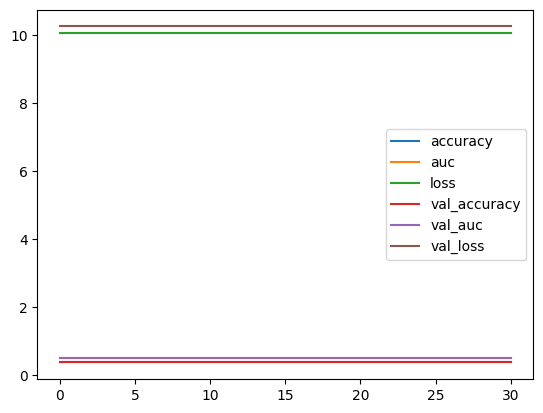

In [298]:
import pandas as pd

pd.DataFrame(history.history).plot()

***

## Pytorch

In [297]:
import torch

print("Pytorch version: ", torch.__version__)

Pytorch version:  2.5.1
